In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
weigh=ctrl.Antecedent(np.arange(100,2000.1,0.1),'weigh') #độ phân giải là 0.1
time=ctrl.Antecedent(np.arange(10,180.1,0.1),'time')
power=ctrl.Consequent(np.arange(0,100.1,0.1),'power')

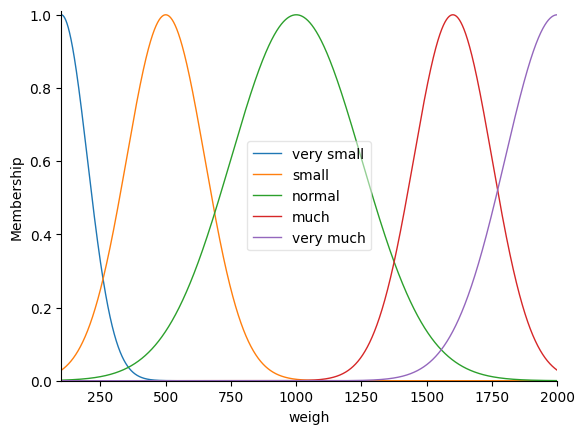

In [4]:
weigh['very small']=fuzz.gaussmf(weigh.universe,100,100)
weigh['small']=fuzz.gaussmf(weigh.universe,500,150)
weigh['normal']=fuzz.gaussmf(weigh.universe,1000,250)
weigh['much']=fuzz.gaussmf(weigh.universe,1600,150)
weigh['very much']=fuzz.gaussmf(weigh.universe,2000,200)
weigh.view()

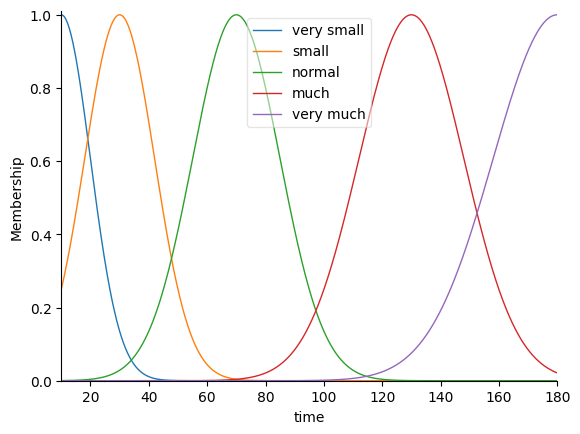

In [5]:
time['very small']=fuzz.gaussmf(time.universe,10,10)
time['small']=fuzz.gaussmf(time.universe,30,12)
time['normal']=fuzz.gaussmf(time.universe,70,15)
time['much']=fuzz.gaussmf(time.universe,130,18)
time['very much']=fuzz.gaussmf(time.universe,180,22)
time.view()

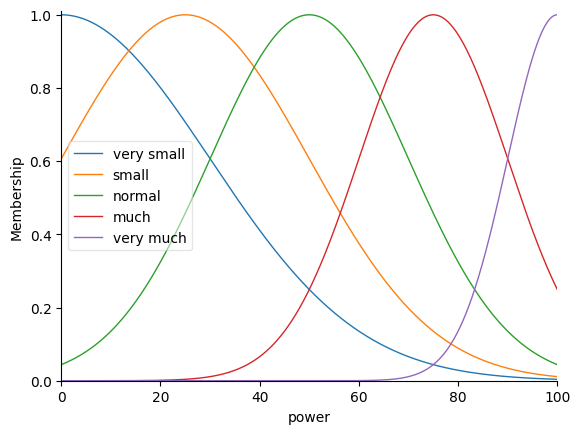

In [6]:
power['very small']=fuzz.gaussmf(power.universe,0,30)
power['small']=fuzz.gaussmf(power.universe,25,25)
power['normal']=fuzz.gaussmf(power.universe,50,20)
power['much']=fuzz.gaussmf(power.universe,75,15)
power['very much']=fuzz.gaussmf(power.universe,100,10)
power.view()

In [9]:
rule1=ctrl.Rule(time['very small']&weigh['very small'],power['normal'])
rule2=ctrl.Rule(time['very small']&weigh['small'],power['normal'])
rule3=ctrl.Rule(time['very small']&weigh['normal'],power['much'])
rule4=ctrl.Rule(time['very small']&weigh['much'],power['very much'])
rule5=ctrl.Rule(time['very small']&weigh['very much'],power['very much'])

rule6=ctrl.Rule(time['small']&weigh['very small'],power['normal'])
rule7=ctrl.Rule(time['small']&weigh['small'],power['small'])
rule8=ctrl.Rule(time['small']&weigh['normal'],power['much'])
rule9=ctrl.Rule(time['small']&weigh['much'],power['much'])
rule10=ctrl.Rule(time['small']&weigh['very much'],power['much'])

rule11=ctrl.Rule(time['normal']&weigh['very small'],power['small'])
rule12=ctrl.Rule(time['normal']&weigh['small'],power['small'])
rule13=ctrl.Rule(time['normal']&weigh['normal'],power['normal'])
rule14=ctrl.Rule(time['normal']&weigh['much'],power['normal'])
rule15=ctrl.Rule(time['normal']&weigh['very much'],power['much'])

rule16=ctrl.Rule(time['much']&weigh['very small'],power['very small'])
rule17=ctrl.Rule(time['much']&weigh['small'],power['very small'])
rule18=ctrl.Rule(time['much']&weigh['normal'],power['small'])
rule19=ctrl.Rule(time['much']&weigh['much'],power['normal'])
rule20=ctrl.Rule(time['much']&weigh['very much'],power['normal'])

rule21=ctrl.Rule(time['very much']&weigh['very small'],power['very small'])
rule22=ctrl.Rule(time['very much']&weigh['small'],power['very small'])
rule23=ctrl.Rule(time['very much']&weigh['normal'],power['small'])
rule24=ctrl.Rule(time['very much']&weigh['much'],power['small'])
rule25=ctrl.Rule(time['very much']&weigh['very much'],power['normal'])

49.80630588951945


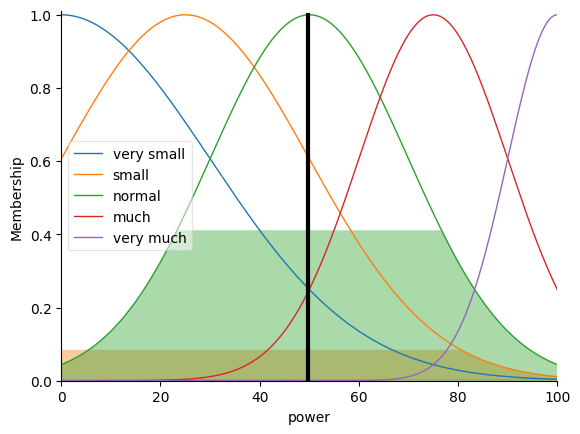

In [11]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['weigh']=1000
tipping.input['time']=90
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)